In [1]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pd.set_option('max_rows', 500)
# pd.set_option('max_columns', 500)

# We can scroll throughout the data unlike getting dot in b/w

In [ ]:
df = pd.read_csv('http://bit.ly/drinksbycountry') # read  file

In [ ]:
df.to_csv('drinks1.csv', index = False)  # saved in machine

In [2]:
df = pd.read_csv('drinks1.csv')

In [ ]:
df

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
df.info()

In [ ]:
df.country.unique

In [ ]:
df.continent.unique

In [ ]:
df.country.nunique()

In [ ]:
df.continent.nunique()

In [ ]:
[[i, df[i].nunique()] for i in df.columns]   

In [ ]:
{i: df[i].nunique() for i in df.columns}

In [ ]:
[{i: df[i].nunique()} for i in df.columns]  # multiple dicts in a list

In [ ]:
dict(df.nunique())

In [ ]:
df.corr()  # correlation

In [17]:
df.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [4]:
df.continent.value_counts(normalize = True) # percentage

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

In [5]:
df.continent.value_counts(normalize = True)*100

Africa           27.461140
Europe           23.316062
Asia             22.797927
North America    11.917098
Oceania           8.290155
South America     6.217617
Name: continent, dtype: float64

In [ ]:
round(df.continent.value_counts(normalize = True)*100, 2)

In [ ]:
(df.continent.value_counts(normalize = True)*100).astype(int)

In [ ]:
df['beer_consump'] = df['beer_servings'].apply(lambda x: 'high' if x >200 else 'medium' if 200>x>100 else 'low')

In [ ]:
df.head(10)

In [ ]:
df.beer_consump.value_counts()

In [ ]:
df['beer_consump'].value_counts().plot()

In [ ]:
df['beer_consump'].value_counts().plot(kind = 'pie')

In [ ]:
df.beer_servings.plot()  # line charts

In [ ]:
df.beer_servings.plot(kind = 'hist')

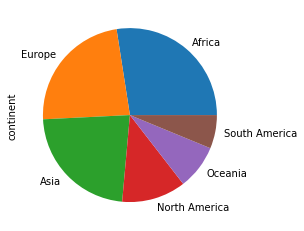

In [6]:
df.continent.value_counts().plot(kind = 'pie')

In [ ]:
df[['beer_servings', 'wine_servings']].describe().plot()

## Groupby

In [ ]:
df.groupby('continent').beer_servings.max().to_frame()

In [11]:
data_beer = df.groupby('continent').beer_servings.sum().to_frame()
data_beer

,beer_servings
continent,
Africa,3258
Asia,1630
Europe,8720
North America,3345
Oceania,1435
South America,2101


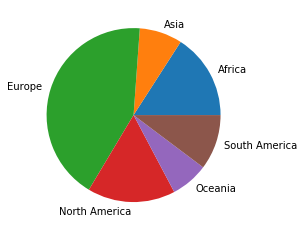

In [12]:
plt.pie( data_beer['beer_servings'],labels=data_beer.index );

In [ ]:
plt.pie(data_beer['beer_servings'],
       labels = ['Africa','Asia','Europe','North America','Oceania','South America']);

In [ ]:
df.groupby(['continent', 'country']).beer_servings.max().to_frame()

In [ ]:
# or
df_c = df.groupby(['continent'])['beer_servings'].mean().to_frame()
df_c

In [ ]:
import numpy as np
display(df_c.beer_servings.round(0).astype(int),
        
        df_c.beer_servings.apply(lambda x: np.round(x,1)),
        
        df_c.beer_servings.apply(lambda x: '%.0f'%x),
        
        df_c.beer_servings.apply(lambda x: int(np.ceil(x))),
       
        df_c.beer_servings.round(0))

# # check datatype
# df_c['beer_servings'] = df_c['beer_servings'].astype(float)
# df_c.beer_servings.dtype 

In [ ]:
df.groupby('continent')['beer_servings'].mean().to_frame().astype(int)

## aggregation function

In [19]:
df.groupby('continent').country.agg([ 'value_counts'])

value_counts
continent     country                   
Africa        Algeria                  1
              Angola                   1
              Benin                    1
              Botswana                 1
              Burkina Faso             1
...                                  ...
South America Paraguay                 1
              Peru                     1
              Suriname                 1
              Uruguay                  1
              Venezuela                1

[193 rows x 1 columns]

In [ ]:
df.groupby('continent').beer_servings.agg(['min', 'max', 'sum', 'mean'])

In [ ]:
df.groupby('continent').country.value_counts().to_frame()

In [ ]:
df.groupby('continent').country.agg(['unique', 'nunique'])

In [20]:
df.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].sum()

,beer_servings,spirit_servings,wine_servings
continent,,,
Africa,3258,866,862
Asia,1630,2677,399
Europe,8720,5965,6400
North America,3345,3812,564
Oceania,1435,935,570
South America,2101,1377,749


In [28]:
df.groupby(['continent']).agg({'beer_servings': 'sum',
                             'wine_servings' : 'mean', 'spirit_servings': 'count'}) # deprecated

,beer_servings,wine_servings,spirit_servings
continent,,,
Africa,3258,16.264151,53
Asia,1630,9.068182,44
Europe,8720,142.222222,45
North America,3345,24.521739,23
Oceania,1435,35.625000,16
South America,2101,62.416667,12


In [29]:
df.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].agg(['sum', 'mean'])

beer_servings             spirit_servings              \
                        sum        mean             sum        mean   
continent                                                             
Africa                 3258   61.471698             866   16.339623   
Asia                   1630   37.045455            2677   60.840909   
Europe                 8720  193.777778            5965  132.555556   
North America          3345  145.434783            3812  165.739130   
Oceania                1435   89.687500             935   58.437500   
South America          2101  175.083333            1377  114.750000   

              wine_servings              
                        sum        mean  
continent                                
Africa                  862   16.264151  
Asia                    399    9.068182  
Europe                 6400  142.222222  
North America           564   24.521739  
Oceania                 570   35.625000  
South America           749   62.416667

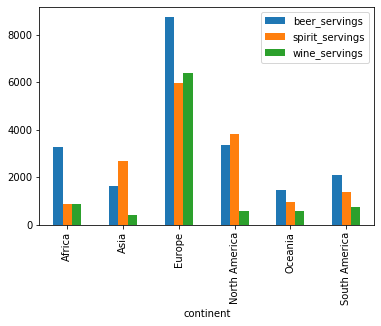

In [30]:
df.groupby('continent')[['beer_servings', 'spirit_servings', 'wine_servings']].sum().plot(kind = 'bar');

In [ ]:
df.groupby('continent')['beer_servings'].agg(['min', 'max', 'sum', 'mean', 'count']).plot(kind = 'bar',figsize = (10,5))

In [ ]:
df.groupby(['continent']).beer_servings.agg(['mean', 'std']).plot(figsize = (10,5),kind = 'area',legend = True);


In [ ]:
df.groupby(['continent']).beer_servings.max().plot(figsize = (5,5),kind = 'barh',legend = True);


In [ ]:
df.groupby(['continent','country']).wine_servings.max().plot(figsize = (5,5),kind = 'box',legend = True);


In [ ]:
df.describe()

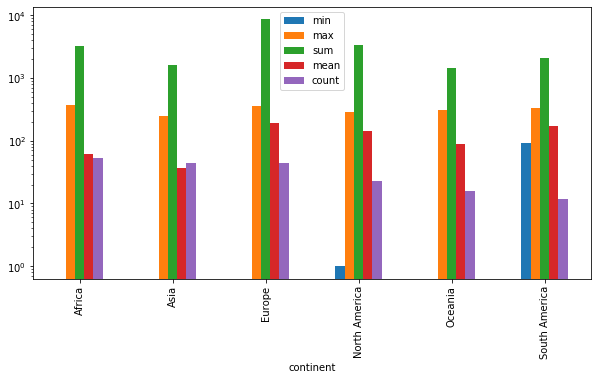

In [33]:
df.groupby('continent')['beer_servings'].agg(['min', 'max', 'sum', 'mean', 'count']).plot(kind = 'bar',figsize = (10,5), logy = True)

In [8]:
df['beer_servings'] = df['beer_servings'].replace(0, df.beer_servings.mean())

In [9]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,106.160622,0,0,0.0,Asia
1,Albania,89.000000,132,54,4.9,Europe
2,Algeria,25.000000,0,14,0.7,Africa
3,Andorra,245.000000,138,312,12.4,Europe
4,Angola,217.000000,57,45,5.9,Africa


In [10]:
df.spirit_servings.replace(132, 100000001)

0              0
1      100000001
2              0
3            138
4             57
         ...    
188          100
189            2
190            0
191           19
192           18
Name: spirit_servings, Length: 193, dtype: int64

In [15]:
df.loc[1, 'wine_servings'] = 131
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,106.160622,0,0,0.0,Asia
1,Albania,89.000000,132,131,4.9,Europe
2,Algeria,25.000000,0,14,0.7,Africa
3,Andorra,245.000000,138,312,12.4,Europe
4,Angola,217.000000,57,45,5.9,Africa


## BINNING AND BUCKETING

In [16]:
d = {
    'Name':['A','B','C','xin','George','Andrea','micheal','maggie','Ravi','Xien','Jalpa','Tyieren','zero'],    
    'Score':[25,50,75,100,50,63,48,56,75,32,77,85,0]
      }
 
dfb = pd.DataFrame(d,columns=['Name','Score'])
dfb

,Name,Score
0,A,25
1,B,50
2,C,75
3,xin,100
4,George,50
5,Andrea,63
6,micheal,48
7,maggie,56
8,Ravi,75
9,Xien,32


### pd.cut 
### lower excluded upper included
### ( excl     ] incl

In [19]:
# This function is also useful for going from a continuous variable to a categorical variable.
# For example, cut could convert ages to groups of age ranges

bin1 = [0,25,50,75,100]
dfb['binned'] = pd.cut(dfb['Score'], bins = bin1)
dfb

,Name,Score,binned
0,A,25,"(0.0, 25.0]"
1,B,50,"(25.0, 50.0]"
2,C,75,"(50.0, 75.0]"
3,xin,100,"(75.0, 100.0]"
4,George,50,"(25.0, 50.0]"
5,Andrea,63,"(50.0, 75.0]"
6,micheal,48,"(25.0, 50.0]"
7,maggie,56,"(50.0, 75.0]"
8,Ravi,75,"(50.0, 75.0]"
9,Xien,32,"(25.0, 50.0]"


In [23]:
label1 = ['class A', 'class B', 'class C', 'class D']
dfb['binned_labels']  = pd.cut(dfb['Score'], bin1, labels = label1)
dfb

,Name,Score,binned,binned_labels
0,A,25,"(0.0, 25.0]",class A
1,B,50,"(25.0, 50.0]",class B
2,C,75,"(50.0, 75.0]",class C
3,xin,100,"(75.0, 100.0]",class D
4,George,50,"(25.0, 50.0]",class B
5,Andrea,63,"(50.0, 75.0]",class C
6,micheal,48,"(25.0, 50.0]",class B
7,maggie,56,"(50.0, 75.0]",class C
8,Ravi,75,"(50.0, 75.0]",class C
9,Xien,32,"(25.0, 50.0]",class B


In [ ]:
# labda and one liner
dfb.Score.apply(lambda x: if 0<x<25)

### include_lowest = True

In [26]:
dfb['binned'] = pd.cut(dfb['Score'],bin1, include_lowest = True)
dfb['binned_labels'] = pd.cut(dfb['Score'], bin1, label1, include_lowest = True)
dfb

,Name,Score,binned,binned_labels
0,A,25,"(-0.001, 25.0]","(-0.001, 25.0]"
1,B,50,"(25.0, 50.0]","(25.0, 50.0]"
2,C,75,"(50.0, 75.0]","(50.0, 75.0]"
3,xin,100,"(75.0, 100.0]","(75.0, 100.0]"
4,George,50,"(25.0, 50.0]","(25.0, 50.0]"
5,Andrea,63,"(50.0, 75.0]","(50.0, 75.0]"
6,micheal,48,"(25.0, 50.0]","(25.0, 50.0]"
7,maggie,56,"(50.0, 75.0]","(50.0, 75.0]"
8,Ravi,75,"(50.0, 75.0]","(50.0, 75.0]"
9,Xien,32,"(25.0, 50.0]","(25.0, 50.0]"


In [34]:
dfb['binned'] = pd.cut(dfb['Score'],bin1, right = False)
dfb['binned_labels_1'] = pd.cut(dfb['Score'], bin1, labels = label1, right = False)
dfb

,Name,Score,binned,binned_labels,binned_labels_N,binned_N,binned_labels_1
0,A,25,"[25.0, 50.0)","(-0.001, 25.0]",class B,"[25.0, 50.0)",class B
1,B,50,"[50.0, 75.0)","(25.0, 50.0]",class C,"[50.0, 75.0)",class C
2,C,75,"[75.0, 100.0)","(50.0, 75.0]",class D,"[75.0, 100.0)",class D
3,xin,100,NaN,"(75.0, 100.0]",NaN,NaN,NaN
4,George,50,"[50.0, 75.0)","(25.0, 50.0]",class C,"[50.0, 75.0)",class C
5,Andrea,63,"[50.0, 75.0)","(50.0, 75.0]",class C,"[50.0, 75.0)",class C
6,micheal,48,"[25.0, 50.0)","(25.0, 50.0]",class B,"[25.0, 50.0)",class B
7,maggie,56,"[50.0, 75.0)","(50.0, 75.0]",class C,"[50.0, 75.0)",class C
8,Ravi,75,"[75.0, 100.0)","(50.0, 75.0]",class D,"[75.0, 100.0)",class D
9,Xien,32,"[25.0, 50.0)","(25.0, 50.0]",class B,"[25.0, 50.0)",class B
